In [2]:
import cv2 #image processing lib
import numpy as np #fast math
from matplotlib import pyplot as plt #plotting
%matplotlib inline 
plt.rcParams['figure.figsize'] = [20, 10] #figure size
from skimage import measure

(128, 128)


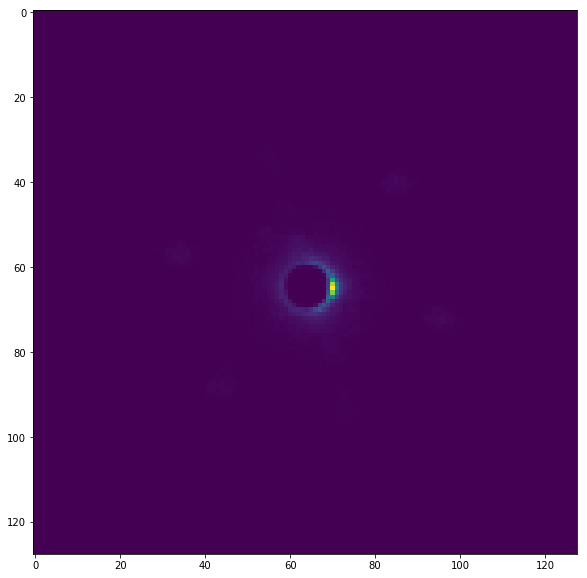

In [3]:
#img = cv2.imread('student_data_sample.png') #load in image
img = np.loadtxt('sansplot.txt')
plt.imshow(img) #show image data
print(np.shape(img))

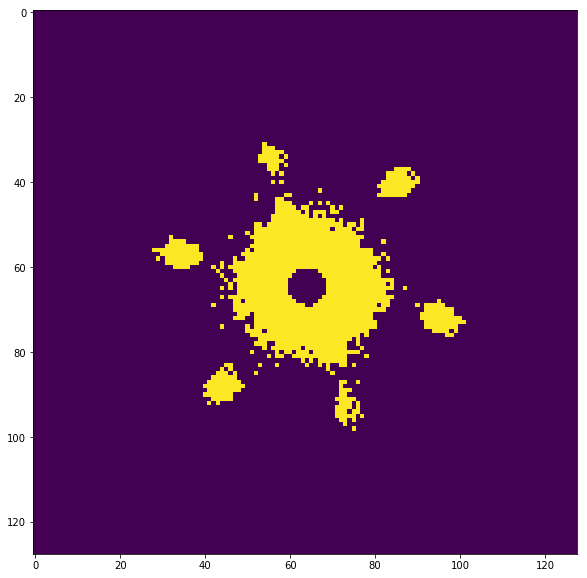

In [4]:
thresh_img = img > 9
plt.imshow(thresh_img)

In [5]:
masked_data = thresh_img * img

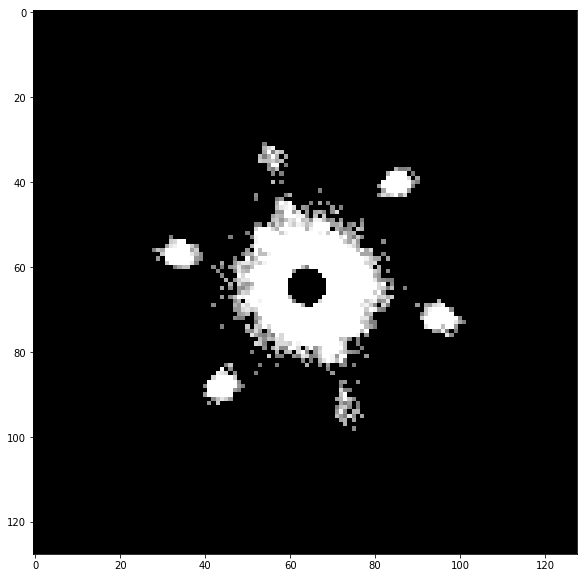

In [6]:
plt.imshow(masked_data, 'gray', vmin = 0, vmax = 20)

In [7]:
all_labels = measure.label(thresh_img)
peak_labels = measure.label(thresh_img)

areas = measure.regionprops(all_labels)

(-7.09758064516129, 127.5, 127.5, -7.116721854304655)

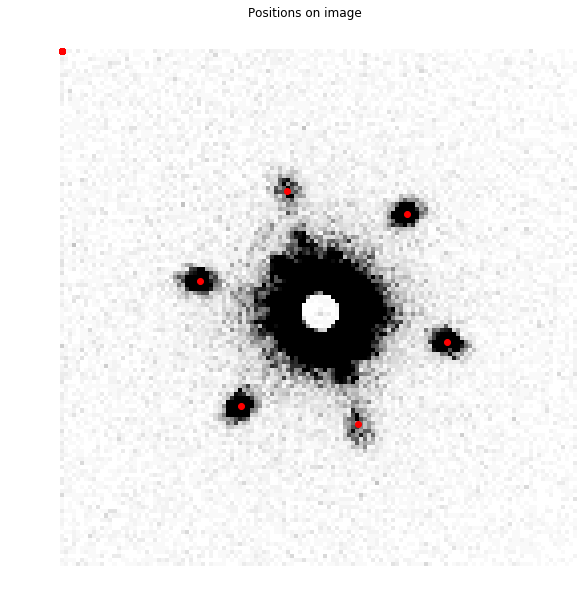

In [8]:
num_atoms = np.max(peak_labels)-1
atom_positions = np.zeros(shape=(num_atoms, 2), dtype=np.float)

for atom_ind in range(num_atoms):
    if areas[atom_ind].area >= 10 and areas[atom_ind].area < 100:
        atom_positions[atom_ind] = areas[atom_ind].centroid
        
# Plot the atom positions on the cleaned image
plt.figure(figsize=(10,10))  
plt.imshow(img, cmap='Greys', interpolation='none', vmin = 0, vmax = 20) 
atom_positions = np.flipud(np.rot90(atom_positions,2)) #to orient atom_positions
                                               #with respect the the cropped image
    
plt.scatter(atom_positions[:,0], atom_positions[:,1], c="r")
plt.title('Positions on image')
plt.axis('off')